In [20]:
import numpy as np
import pandas as pd
from DataProcessing import Data
import matplotlib.pyplot as plt
import seaborn as sns                       #visualisation
sns.set_theme(color_codes=True)

# 1. Get Data 

## 1.1. Get Data from folder

In [21]:
d = Data()
d.get_index_names()

S&P 500: ['AAPL', 'ORCL', 'GOOGL', 'AMZN', 'BK', 'LIFE', 'T', 'XOM']
 VN: ['VHM', 'CTR', 'FPT', 'MBB']


['AAPL',
 'ORCL',
 'GOOGL',
 'AMZN',
 'BK',
 'LIFE',
 'T',
 'XOM',
 'VHM',
 'CTR',
 'FPT',
 'MBB']

In [22]:
chosen_index = 'GOOGL'

In [23]:
d.preprocess(chosen_index)

Processing GOOGL.csv
Saved GOOGL data at data/processed/GOOGL.csv


In [24]:
df = d.get_data(chosen_index)

In [25]:
df.columns

Index(['Date', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MFI', 'EMA', 'SO',
       'MACD', 'Next Day Price'],
      dtype='object')

# 2. Train model

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  train_test_split

In [27]:
X = df[df.columns[1:10]].values
Y = df[df.columns[10]].values

In [28]:
df.columns[1:10]

Index(['High', 'Low', 'Close', 'Volume', 'RSI', 'MFI', 'EMA', 'SO', 'MACD'], dtype='object')

In [29]:
# plt.plot(df['RSI'],color='pink',label='RSI')
# plt.plot(Y,color='green',label='Close Price')
# plt.plot(df['EMA'],color='blue',label='EMA')
# # legend
# plt.legend(loc='best')
# plt.title(f'{chosen_index}')
# plt.show()

## 2.1. Split data

### 2.1.2. Unchronologically

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=37)

### 2.1.2. Chronologically

In [31]:
TRAIN_PERCENT = 0.8
train_size = int(TRAIN_PERCENT*len(X))

X_train = X[0:train_size]
Y_train = Y[0:train_size]
X_test = X[train_size:len(X)]
Y_test = Y[train_size:len(Y)]

## 2.2. Train model

In [32]:
from helper import prepare_data


def train_model(index):
    X_train, Y_train, X_test, Y_test = prepare_data(index)
    model = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)
    model.fit(X_train,Y_train)
    model.score(X_test,Y_test)

    return model

model = train_model(chosen_index)

X_train: (996, 9), Y_train: (996,), X_test: (249, 9), Y_test: (249,)


# Evaluation

In [33]:
from helper import calculate_loss
X_train, Y_train, X_test, Y_test = prepare_data(chosen_index)
calculate_loss(model, X_test, Y_test)


X_train: (996, 9), Y_train: (996,), X_test: (249, 9), Y_test: (249,)
Out-of-Bag Score: 0.9947838907618552
R-squared: 0.9564337221905517
Root Mean Squared Error: 2.6214853261497377
Mean Absolute Percentage Error: 0.015510925352735759
Mean Absolute Error: 1.9691401065688543


(6.872185315218396,
 0.9564337221905517,
 2.6214853261497377,
 0.015510925352735759,
 1.9691401065688543)

## Plot Result

In [34]:
Y_predict = model.predict(X_test)

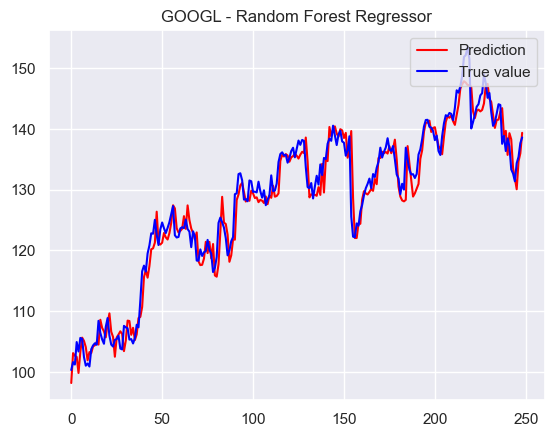

In [35]:
plt.plot(Y_predict,color='red',label='Prediction')
plt.plot(Y_test,color='blue',label='True value')
plt.legend(loc='upper right')
plt.title(f'{chosen_index} - Random Forest Regressor')
plt.show()

## Save results

In [39]:
import time
from helper import calculate_loss, prepare_data

mae = []
mse = []
r2 = []
rmse = []
mape = []
avg_runtime = 0

list_tickers = d.get_sp500_tickers()
# track run time

for ticker in list_tickers:
    start = time.time()
    X_train, Y_train, X_test, Y_test = prepare_data(ticker)

    # call model
    model = train_model(ticker)

    # predictions = model.predict(X_test)
    mse_, r2_, rmse_, mape_, mae_ = calculate_loss(model, X_test, Y_test)
    mae.append(mae_)
    mse.append(mse_)
    r2.append(r2_)
    rmse.append(rmse_)
    mape.append(mape_)

    end = time.time()
    avg_runtime += (end-start)

mae = np.mean(list(mae))
mse = np.mean(list(mse))
r2 = np.mean(list(r2))
rmse = np.mean(list(rmse))
mape = np.mean(list(mape))
avg_runtime = avg_runtime/len(list_tickers)

with open('output/evaluation.csv', 'a') as f:
    f.write(f'Random Forest,{mae},{mse},{r2},{rmse},{mape},{avg_runtime}\n')

X_train: (996, 9), Y_train: (996,), X_test: (249, 9), Y_test: (249,)
X_train: (996, 9), Y_train: (996,), X_test: (249, 9), Y_test: (249,)
Out-of-Bag Score: 0.9957085322069584
R-squared: -0.21724832273845185
Root Mean Squared Error: 11.340231127850629
Mean Absolute Percentage Error: 0.047237416272569846
Mean Absolute Error: 8.837604247556632
X_train: (996, 9), Y_train: (996,), X_test: (249, 9), Y_test: (249,)
X_train: (996, 9), Y_train: (996,), X_test: (249, 9), Y_test: (249,)
Out-of-Bag Score: 0.9913897779025137
R-squared: -1.9648943946157726
Root Mean Squared Error: 15.8055453656493
Mean Absolute Percentage Error: 0.11984319532318775
Mean Absolute Error: 13.556468377783595
X_train: (996, 9), Y_train: (996,), X_test: (249, 9), Y_test: (249,)
X_train: (996, 9), Y_train: (996,), X_test: (249, 9), Y_test: (249,)
Out-of-Bag Score: 0.9947838907618552
R-squared: 0.9564337221905517
Root Mean Squared Error: 2.6214853261497377
Mean Absolute Percentage Error: 0.015510925352735759
Mean Absolute E